# Kalman Filters  
28/10/25

In [1]:
import numpy as np
import matplotlib.pyplot as plt

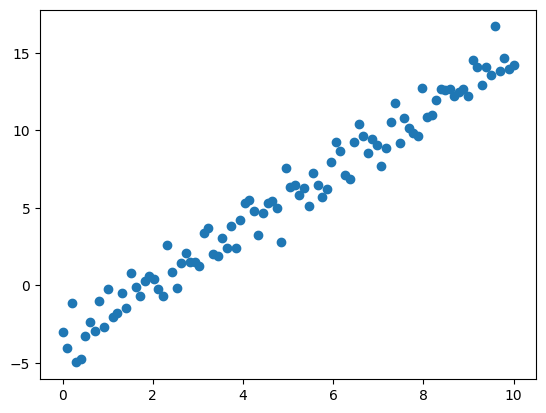

In [2]:
def generate_linear_data():
    x = np.linspace(0,10,100)
    y = 1.8*x -3.21 + np.random.normal(0,1,100)
    return x, y

xs, ys = generate_linear_data()

plt.scatter(xs, ys)

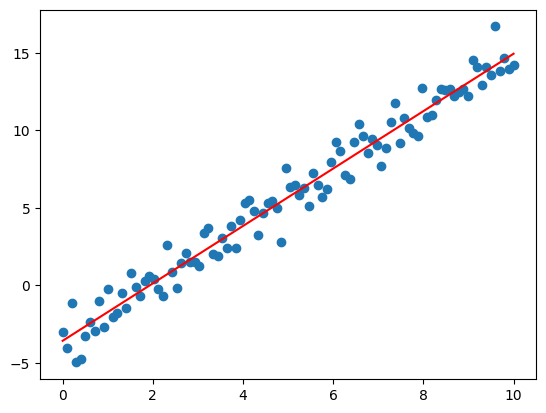

In [3]:
xs_ = np.c_[np.ones(100), xs]
w_opt = np.linalg.inv(xs_.T @ xs_) @ (xs_.T @ ys.reshape(-1,1))

y_hat = xs_ @ w_opt

plt.scatter(xs, ys, label="Y")
plt.plot(xs, y_hat, label="y_hat", color="red")

In [4]:
class KalmanFilterReg():
    def __init__(self):
        #Initial Estimation
        self.w = np.array([-3,1.5])

        #Transition Matrix
        self.A = np.eye(2)

        # Noise in estimations
        self.Q = np.eye(2) * 0.01

        # Noise in observations
        self.R = np.array([[1]]) * 10

        #Error in covariance predictions
        self.P = np.eye(2)

    def predict(self):
        self.P = self.A @ self.P @ self.A.T + self.Q

    def update(self, x):
        C = np.array([[1, x]])
        S = C @ self.P @ C.T + self.R
        K = self.P @ C.T @np.linalg.inv(S)

        #Update error in covariance prediction
        self.P = (np.eye(2) - K @ C) @ self.P

        #Update estimations -> x_t | t
        self.w = self.w + K @ (y - C @ self.w)

    @property
    def params(self):
        #Return w0 and w1 of the linear model
        return self.w[0], self.w[1]

In [5]:
kalman = KalmanFilterReg()
kalman_preds = []


for i in range(len(xs)):
    #at the start
    kalman.predict()

    #update w
    x = xs_[i]
    y = ys[i]

    # Update kalman 
    w0, w1 = kalman.params
    kalman_preds.append(w0 + w1*x)


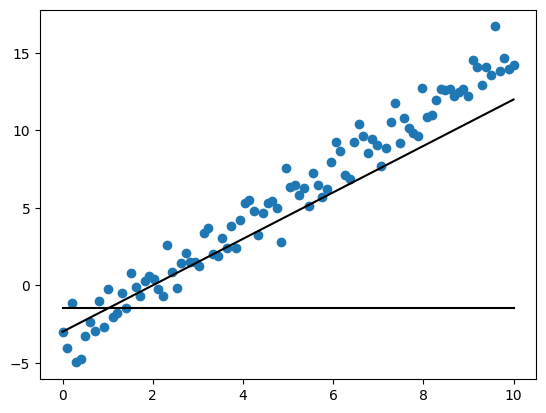

In [6]:
plt.scatter(xs, ys)
plt.plot(xs, kalman_preds, 'k')